In [10]:
import numpy as np
import scipy
from scipy import linalg

EX 1

In [4]:
def pb1(A):
    s=scipy.linalg.svdvals(A)
    if min(s)==0:
        return np.inf
    else:
        return max(s)/min(s)


A= np.random.rand(6, 6)

print("\nmy function:", pb1(A),"\n")
print("numpy:",np.linalg.cond(A))



my function: 19.3864145695 

numpy: 19.3864145695


EX 2

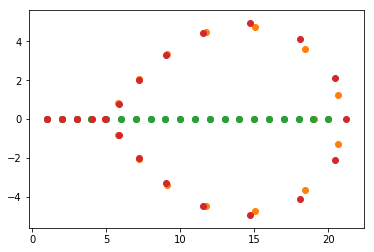

In [6]:
import sympy as sy
from matplotlib import pyplot as plt

w_roots = np.arange(1,21)

x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
w_coeffs=np.array(w.all_coeffs())


h=np.random.normal(1,1e-10,21)

new_coeffs = w_coeffs * h
new_roots = np.roots(np.poly1d(new_coeffs))

plt.scatter(np.real(w_roots),np.imag(w_roots))
plt.scatter(np.real(new_roots),np.imag(new_roots))
plt.show()

EX 3

In [7]:
def pb3(A):
    lamb=scipy.linalg.eigvals(A)
    reals=np.random.normal(0,1e-10,A.shape)
    imag=np.random.normal(0,1e-10,A.shape)
    H = reals + 1j*imag
    lamb_p=scipy.linalg.eigvals(A+H)
    
    cond_abs=np.linalg.norm(lamb-lamb_p)/np.linalg.norm(H)
    cond_rel=cond_abs*np.linalg.norm(A)/np.linalg.norm(lamb)
    return cond_abs,cond_rel


EX 4

In [8]:
def pb4(x_min,x_max,y_min,y_max,res):
    X=np.linspace(x_min,x_max,100)
    Y=np.linspace(y_min,y_max,100)
    Result=np.zeros([100,100])
    for i in range(100):
        for j in range(100):
            A=np.array([[1,X[i]],[Y[j],1]])
            a,b=pb3(A)
            Result[i,j]=b
    plt.pcolormesh(Result,cmap='gray_r')        
    return Result

EX 5

In [9]:
def pb5(n):
    xk,yk = np.load("stability_data.npy").T
    A=np.vander(xk,n+1)
    sol_norm=np.dot(np.linalg.inc(np.dot(A.T,A)),np.dot(A.T,yk))
    Q,R=np.linalg.qr(A,'economic')
    sol_dec=scipy.linalf.solve_triangular(R,np.dot(Q.T,yk))
    plt.scatter(xk,yk)
    plt.plot(xk,np.dot(A,sol_norm))
    plt.plot(xk,np.dot(A,sol_dec))
    fe_norm=np.linalg.norm(np.dot(A,sol_norm)-yk,2)
    fe_dec=np.linalg.norm(np.dot(A,sol_dec)-yk,2)
    return fe_norm, fe_dec    